#### We are a mail-delivery book startup. You fill out a profile with us about your book preferences, and we will send you 5 books each month for free. Whatever you like you keep and pay for, and whatever you don't like you send back. Sound familiar?

As a company we have to buy our books ahead of time. We took out a loan last month to buy our original batch of books. The value of the loan was the total cost of all the books that we bought. We made some money back through customers buying our books last month. Next month, we know which books we will be sending to which customers, but we do not know who will buy what books. It costs 0.60/book each way for shipping books to and from customers. The question for you to answer is:

#### Will we be able to both pay back our loan and afford our next book purchase order?

#### Data
We've provided some data for you to help answer this question. All of the following are csv files.

- original_purchase_order: Quantity of books originally purchased indexed by a unique product ID.
- next_purchase_order: Planned quantity of books to purchase at the end of next month indexed by a unique product ID.
- customer_features: Customer features generated by the profiles that customers fill out with us indexed by a unique customer ID.
- product_features: Product features that we have generated from our knowledge of our books indexed by a unique product ID.
- last_month_assortment: Data on which books were sent to which customers and whether or not the customer purchased the book. There is no index.
- next_month_assortment: Data on which books will be sent to which customers next month. There is no index.

#### Purpose
The purpose of this test is to assess how well you translate business problems into machine learning solutions as well as get an understanding of your coding ability and style. This is also a chance to give you insights into our business and some problems that we may be thinking about.

We do not want to assess your feature engineering prowess or how accurate you can make your machine learning model because we do not want you to spend all day on this. With that being said, you should build valid features and have solid reasoning behind the parameters that you have chosen for your model. We are trying to be respectful of your time. We are not assessing how elaborate your script can be.

#### Explain:
Which machine learning model you chose to use and why
How you validated your model and why you chose to validate it in this way.
How to run your script

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [3]:
#reading dataframes

cust_features = pd.read_csv('customer_features.csv')
last_month = pd.read_csv('last_month_assortment.csv')
next_month = pd.read_csv('next_month_assortment.csv')
next_purch = pd.read_csv('next_purchase_order.csv')
last_purch = pd.read_csv('original_purchase_order.csv')
prod_features = pd.read_csv('product_features.csv')

In [4]:
last_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 3 columns):
customer_id    36000 non-null int64
product_id     36000 non-null int64
purchased      36000 non-null bool
dtypes: bool(1), int64(2)
memory usage: 597.7 KB


In [5]:
last_month.head()

,customer_id,product_id,purchased
0,1000078,1730073,False
1,1000078,1470520,False
2,1000078,1861356,False
3,1000078,1240824,True
4,1000078,1155460,False


In [6]:
next_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56400 entries, 0 to 56399
Data columns (total 2 columns):
customer_id    56400 non-null int64
product_id     56400 non-null int64
dtypes: int64(2)
memory usage: 881.3 KB


In [7]:
next_month.head()

,customer_id,product_id
0,1600785,1443029
1,1600785,1164138
2,1600785,1636511
3,1600785,1832547
4,1600785,1237420


In [8]:
last_purch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
product_id            1000 non-null int64
quantity_purchased    1000 non-null int64
cost_to_buy           1000 non-null float64
retail_value          1000 non-null float64
dtypes: float64(2), int64(2)
memory usage: 31.3 KB


In [9]:
last_purch.head()

,product_id,quantity_purchased,cost_to_buy,retail_value
0,1769808,77,2.20,16.67
1,1896283,67,1.46,9.59
2,1889979,80,2.06,13.36
3,1341288,85,1.25,6.57
4,1666328,60,1.51,10.49


In [10]:
next_purch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
product_id            300 non-null int64
quantity_purchased    300 non-null int64
cost_to_buy           300 non-null float64
retail_value          300 non-null float64
dtypes: float64(2), int64(2)
memory usage: 9.4 KB


In [11]:
next_purch.head()

,product_id,quantity_purchased,cost_to_buy,retail_value
0,1479507,39,1.82,12.68
1,1681385,55,1.73,12.88
2,1771749,37,1.26,10.38
3,1605149,49,1.47,11.27
4,1861356,34,1.98,10.41


In [12]:
prod_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
product_id    1000 non-null int64
length        1000 non-null int64
difficulty    1000 non-null int64
fiction       1000 non-null bool
genre         1000 non-null object
dtypes: bool(1), int64(3), object(1)
memory usage: 32.3+ KB


In [13]:
prod_features.head()

,product_id,length,difficulty,fiction,genre
0,1769808,148,3,False,Self-Help
1,1896283,161,5,False,Biography
2,1889979,296,4,False,History
3,1341288,551,4,True,Thriller
4,1666328,623,-1,True,Sci-Fi


In [14]:
#This dataframe needs some work

cust_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 4 columns):
customer_id              12000 non-null int64
age_bucket               11500 non-null object
is_returning_customer    12000 non-null bool
favorite_genres          12000 non-null object
dtypes: bool(1), int64(1), object(2)
memory usage: 293.0+ KB


In [15]:
cust_features.head()

,customer_id,age_bucket,is_returning_customer,favorite_genres
0,1000078,46-55,True,"['Classic', 'History', 'Self-Help', 'Romance',..."
1,1000102,46-55,True,"['Beach-Read', 'Pop-Sci', 'Pop-Psychology', 'B..."
2,1000185,46-55,True,"['Romance', 'Self-Help', 'Beach-Read', 'Pop-Ps..."
3,1000423,26-35,True,"['Classic', 'Drama']"
4,1000696,66+,True,"['Drama', 'Thriller', 'Sci-Fi', 'Romance', 'Hi..."


#### Customer Features needs some work - I'm going to separate the Favorite Genres from the rest of the data frame, to turn each genre into a column and then reassemble customer features with each genre as a column so we can model the data.

In [16]:
#turning favorite_genres into it's own dataframe
#stripping brackets from text

genres = cust_features[['favorite_genres']]
genres['favorite_genres'] = genres.favorite_genres.apply(lambda x: x.strip(' []'))

In [17]:
#writing a function that groups by genre 
#we split the values at the comma
#then we get dummies for the series
#then we group by the maxiumum for each group

def genre_func(group):
    return pd.Series(group.favorite_genres.str.split(', ').values[0], name='genres')

ser = genres.groupby(level=0).apply(genre_func)
pd.get_dummies(ser)
df_genre = pd.get_dummies(ser).groupby(level=0).apply(lambda group: group.max())

In [18]:
df_genre.head()

,,'Beach-Read','Biography','Classic','Drama','History','Pop-Psychology','Pop-Sci','Romance','Sci-Fi','Self-Help','Thriller'
0,0,1,0,1,0,1,1,1,1,1,1,1
1,0,1,1,0,1,0,1,1,0,1,1,0
2,0,1,0,0,0,0,1,0,1,0,1,0
3,0,0,0,1,1,0,0,0,0,0,0,0
4,0,1,1,0,1,1,0,0,1,1,0,1


In [19]:
#eliminating the first column from this dataframe

df_genre = df_genre[["'Beach-Read'", "'Biography'", "'Classic'", "'Drama'",
       "'History'", "'Pop-Psychology'", "'Pop-Sci'", "'Romance'",
       "'Sci-Fi'", "'Self-Help'", "'Thriller'"]]

In [20]:
#renaming columns

df_genre.columns = ["Beach-Read", "Biography", "Classic", "Drama",
       "History", "Pop-Psychology", "Pop-Sci", "Romance",
       "Sci-Fi", "Self-Help", "Thriller"]

In [21]:
#joining genres into full dataframe

cust_features = cust_features[['customer_id', 'age_bucket', 'is_returning_customer']]
cust_features = pd.concat([cust_features, df_genre], axis=1)
cust_features.head()

,customer_id,age_bucket,is_returning_customer,Beach-Read,Biography,Classic,Drama,History,Pop-Psychology,Pop-Sci,Romance,Sci-Fi,Self-Help,Thriller
0,1000078,46-55,True,1,0,1,0,1,1,1,1,1,1,1
1,1000102,46-55,True,1,1,0,1,0,1,1,0,1,1,0
2,1000185,46-55,True,1,0,0,0,0,1,0,1,0,1,0
3,1000423,26-35,True,0,0,1,1,0,0,0,0,0,0,0
4,1000696,66+,True,1,1,0,1,1,0,0,1,1,0,1


### Finding the Cost of the Books and Shipping

In [22]:
#this function calculates the total cost of each product

def total_costs(df):
    df['cost_by_product'] = df['quantity_purchased']*df['cost_to_buy']

#### The total cost of last month's loan

In [23]:
#making a copy of last month's purchases dataframe
#applying the function
#getting the sum
#total cost of last month's loan = $135,546.42

last_purch2 = last_purch.copy(deep=True)
total_costs(last_purch2)
round(sum(last_purch2['cost_by_product']),2)

135546.42

#### The total cost of next month's loan

In [24]:
#doing the same for next month's purchase
#this doesn't quite make sense as there are fewer products than listed
#total costs of next month's loan $24,155.51

total_costs(next_purch)
round(sum(next_purch['cost_by_product']),2)

24155.51

In [25]:
#only 300 unique IDs for next month's purchases

next_purch['product_id'].nunique()

300

#### There are only 300 unique product IDs in Next Purchase Order, while there are 1000 unique product IDs in Next Month Assortment and Last Month Assortment - let's investigate

In [26]:
#unique customers & products per month

print 'last month unique customers: '+ str(last_month['customer_id'].nunique())
print 'last month unique products: ' + str(last_month['product_id'].nunique())
print 'last month products purchased: ' + str(sum(last_purch['quantity_purchased']))
print 'last month total products shipped: '+ str(len(last_month))
print ' '
print 'next month unique customers: '+ str(next_month['customer_id'].nunique())
print 'next_month unique products: ' + str(next_month['product_id'].nunique())
print 'next_month products purchased: ' + str(sum(next_purch['quantity_purchased']))
print 'next month total products shipped: '+ str(len(next_month))

last month unique customers: 7200
last month unique products: 1000
last month products purchased: 74491
last month total products shipped: 36000
 
next month unique customers: 11280
next_month unique products: 1000
next_month products purchased: 13469
next month total products shipped: 56400


In [27]:
#merging last month's product info with next month's order/distribution

held_over = next_month.merge(last_purch, on = 'product_id', how='left') 
print held_over['product_id'].nunique()

1000


### we found cost information for 1000 unique products shipped next month in last month's purchase inventory apparently we're re-buying a lot of products from last month and not adding unique inventory each month

#### Finding the cost of last month's shipping

In [28]:
#writing a function to find the cost of last month's shipping
#if a customer purchased the item, we only need to pay $0.60 for shipping one way
#if they did not, we need to pay $1.20 for shipping both ways

def shipping_cost(x):
    if x == True:
        return 0.6
    else:
        return 1.2
    
last_month['shipping_cost'] = last_month[['purchased']].apply(lambda x: shipping_cost(*x), axis=1)
round(sum(last_month['shipping_cost']),2)

35592.6

### Total Costs
- Last month the book loan cost: 135,546.42
- Next month the book loan cost: 24,155.51
- Last month shipping cost: 35,592.60
- Total costs last month: 171,139.02
- Total costs on books:  159,701.93

### Make full dataframes for last month and this month and prepare for modeling



In [29]:
#making full dataframes for last month and next month

def full_df_merge(y, z):
    x = y.merge(z, on = 'product_id')
    x = x.merge(prod_features, on = 'product_id')
    x = x.merge(cust_features, on='customer_id')
    return x

lm = full_df_merge(last_month, last_purch)
nm = full_df_merge(next_month, last_purch)

In [30]:
#filling NA with number for regression
#encoding ages and converting to integers
#label encoding true/false as variables, 0 = False, 1 = True

lm['age_bucket'] = lm['age_bucket'].fillna(7).astype(str)
nm['age_bucket'] = nm['age_bucket'].fillna(7).astype(str)

lm['age_bucket'] = lm['age_bucket'].str[0].astype(int)
nm['age_bucket'] = nm['age_bucket'].str[0].astype(int)

le = LabelEncoder()
lm['purchased'] = le.fit_transform(lm['purchased'])
lm['fiction'] = le.fit_transform(lm['fiction'])
lm['genre'] = le.fit_transform(lm['genre'])
lm['is_returning_customer'] = le.fit_transform(lm['is_returning_customer'])
nm['is_returning_customer'] = le.fit_transform(nm['is_returning_customer'])
nm['fiction'] = le.fit_transform(nm['fiction'])
nm['genre'] = le.fit_transform(nm['genre'])

In [31]:
#fit-transform purchased booleans true/false as variables, 0 = False, 1 = True
#writing function for both dataframes that:
#fills NA with number for regression
#encodes ages, genres and booleans and converts to integers

le = LabelEncoder()
lm['purchased'] = le.fit_transform(lm['purchased'])

def transform_df(x):
    x['age_bucket'] = x['age_bucket'].fillna(7).astype(str)
    x['age_bucket'] = x['age_bucket'].str[0].astype(int)
    x['fiction'] = le.fit_transform(x['fiction'])
    x['genre'] = le.fit_transform(x['genre'])
    x['is_returning_customer'] = le.fit_transform(x['is_returning_customer'])
    return x
    
lm = transform_df(lm)
nm = transform_df(nm)

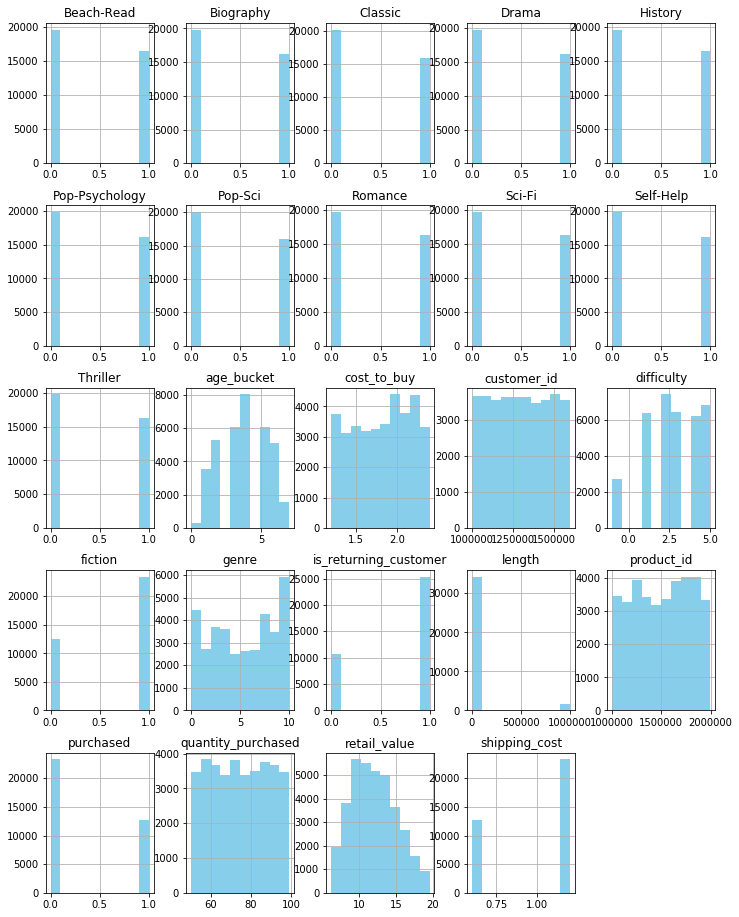

In [25]:
#visualizing distributions

lm.hist(figsize = (12, 16), color = 'skyblue');

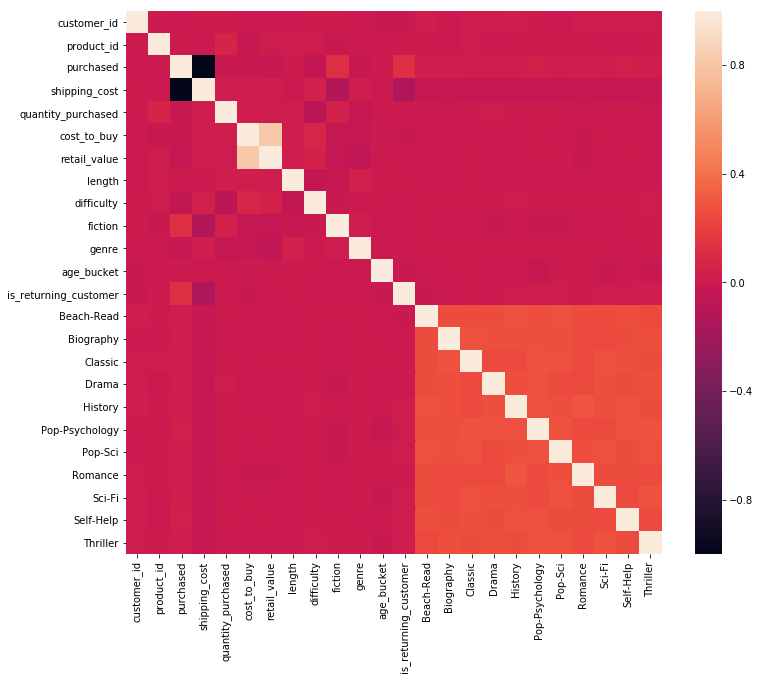

In [32]:
#looking at correlations to prevent colinearity and for feature engineering

fig, ax = plt.subplots(figsize=(12,10))  
corr = lm.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);

- There's a strong negative correlation between shipping cost and if the user purchased the item or not, probably because the cost of shipping the item is going to be much higher if the user didn't purchase it, so shipping cost isn't going into the model. 
- All of the genres have low-to-mid correlation, which is surprising because they aren't really dummy variables, in that each user will only "check" one genre. Many users check multiple genres, so we're not dealing with The Dummy Trap by leaving them all in. So I'm not dropping a dummy variable for regression. 
- Purchased and Quantity Purchased stand for different things - Purchased refers to whether the customer purchased the item or not, while Quantity Purchased refers to the quantity of the item purchased by the company to sell to customers, so quantity purchased is going into the model.

In [48]:
#splitting into data and target values

y = lm['purchased'].values
X = lm[['quantity_purchased','cost_to_buy', 'retail_value','length',
       'difficulty', 'fiction', 'genre', 'age_bucket',
       'is_returning_customer', "Beach-Read", "Biography", "Classic",
       "Drama", "History", "Pop-Psychology", "Pop-Sci",
       "Romance", "Sci-Fi", "Self-Help", "Thriller"]]

In [49]:
#min max scaler

X = MinMaxScaler().fit_transform(X)

In [50]:
#test train split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Modeling The Data

In [51]:
#choosing some Classifcation Algorithms that I like for this problem 
#and looking at their accuracy scores
#Logistic Classification, Adaptive Boosting, Decision Tree, Support Vector Machines, Random Forest, 
#Extremely Randomized Trees, Ridge and K-Nearest Neighbors
#performance is consistent and mediocre - Adaboost is the best

models = [LogisticRegression(penalty='l1'),
          AdaBoostClassifier(),
          DecisionTreeClassifier(),
          SVC(),
          RandomForestClassifier(),
          ExtraTreesClassifier(),
          RidgeClassifier(tol=1e-2, solver="lsqr"),
          KNeighborsClassifier(n_neighbors=10)
         ]

res = []

for model in models:
    print model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print score
    res.append([model, score])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.6478956228956229
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)
0.7575757575757576
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.6686868686868687
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol

In [38]:
#making logistic regression model

lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
score = accuracy_score(y_test, y_pred)
print score
print confusion_matrix(y_test, y_pred)
print classification_report(y_test, y_pred)

0.6478114478114478
[[7537  135]
 [4049  159]]
             precision    recall  f1-score   support

          0       0.65      0.98      0.78      7672
          1       0.54      0.04      0.07      4208

avg / total       0.61      0.65      0.53     11880



In [52]:
#creating Adaptive Boosting model
#this model had the highest accuracy score
#the scores are consistently good

ab = AdaBoostClassifier()
ab.fit(X_train, y_train)
y_pred = ab.predict(X_test)
score = accuracy_score(y_test, y_pred)
print score
print confusion_matrix(y_test, y_pred)
print classification_report(y_test, y_pred)

0.7575757575757576
[[6477 1195]
 [1685 2523]]
             precision    recall  f1-score   support

          0       0.79      0.84      0.82      7672
          1       0.68      0.60      0.64      4208

avg / total       0.75      0.76      0.75     11880



In [53]:
#Random Forest has similar performance to AdaBoost but slightly worse
#we're going to go with AdaBoost

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print score
print confusion_matrix(y_test, y_pred)
print classification_report(y_test, y_pred)

0.7284511784511785
[[6560 1112]
 [2114 2094]]
             precision    recall  f1-score   support

          0       0.76      0.86      0.80      7672
          1       0.65      0.50      0.56      4208

avg / total       0.72      0.73      0.72     11880



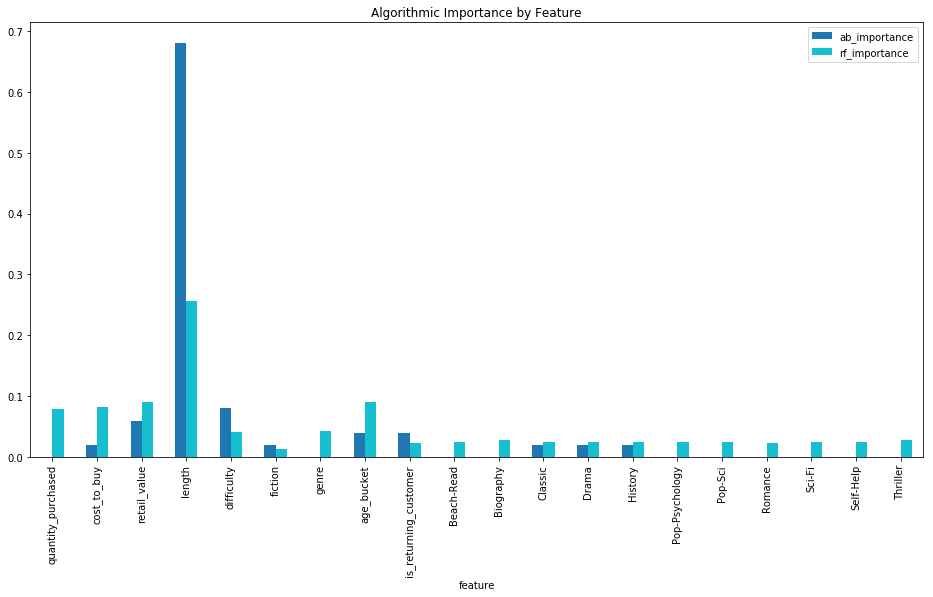

In [56]:
cols = ['quantity_purchased','cost_to_buy', 'retail_value','length',
       'difficulty', 'fiction', 'genre', 'age_bucket',
       'is_returning_customer', "Beach-Read", "Biography", "Classic",
       "Drama", "History", "Pop-Psychology", "Pop-Sci",
       "Romance", "Sci-Fi", "Self-Help", "Thriller"]

features = pd.DataFrame(zip(cols, np.transpose(ab.feature_importances_),
                 np.transpose(rf.feature_importances_), ), 
             columns = ['feature', 'ab_importance', 'rf_importance'])
features = features.set_index('feature')
features.plot(kind='bar', colormap='tab10', title='Algorithmic Importance by Feature', figsize = (16,8));

### Length is most closely related to purchasing

In [57]:
#preparing next month's data for modeling

nm2 = nm[['quantity_purchased','cost_to_buy', 'retail_value','length',
       'difficulty', 'fiction', 'genre', 'age_bucket',
       'is_returning_customer', "Beach-Read", "Biography", "Classic",
       "Drama", "History", "Pop-Psychology", "Pop-Sci",
       "Romance", "Sci-Fi", "Self-Help", "Thriller"]]
nmX = MinMaxScaler().fit_transform(nm2)

In [58]:
#running AdaBoost on next month's data, making sure the predictions look realisic
#15312 seems realistic

nmy_pred = ab.predict(nmX)
sum(nmy_pred)

15312

In [59]:
#looking at purchase rates for last month

sum(lm['purchased'])
len(lm)

#comparing purchase rates last and this month

print str(round(((12679.0/36000.0))*100, 2)) +"% of items were purchased last month"
print str(round((15503.0/len(nmX)*100), 2))+"% of items will be purchased next month with this model"

35.22% of items were purchased last month
27.49% of items will be purchased next month with this model


In [60]:
#adding predicted purchases to next month's dataframe
#writing function to calculate shipping cost per predicted item
#appending that to dataframe
#finding the predicted sum of purchases

nm['pred_purchase'] = nmy_pred

def shipping_cost2(x):
    if x == 1:
        return 0.6
    else:
        return 1.2
    
def sales(x, y):
    if x == 1:
        return y
    else:
        return 0

nm['pred_shipping_cost'] = nm[['pred_purchase']].apply(lambda x: shipping_cost(*x), axis=1)
nm['pred_sales'] = nm[['pred_purchase', 'retail_value']].apply(lambda x: sales(*x), axis=1)
print 'predicted shipping costs: '+ str(round(sum(nm['pred_shipping_cost']),2))
print 'predicted sales: ' +str(sum(nm['pred_sales']))

predicted shipping costs: 58492.8
predicted sales: 183416.42999999996


In [61]:
#making a copy of the dataframe
#creating a function that calculates sales
#applying the function that calculates shipping costs
#summing sales and costs

lm['sales'] = lm[['purchased', 'retail_value']].apply(lambda x: sales(*x), axis=1)
lm['shipping_cost'] = lm[['purchased']].apply(lambda x: shipping_cost(*x), axis=1)
print 'last month shipping costs: ' + str(sum(lm['shipping_cost']))
print 'last month sales: ' + str(sum(lm['sales']))

last month shipping costs: 35592.59999999686
last month sales: 151617.35999999923


In [62]:
predicted_shipping_costs = round(sum(nm['pred_shipping_cost']),2)
predicted_sales = sum(nm['pred_sales'])
last_month_shipping_costs = sum(lm['shipping_cost'])
last_month_sales = sum(lm['sales'])
last_month_loan = round(sum(last_purch2['cost_by_product']),2)
next_month_loan = round(sum(next_purch['cost_by_product']),2)

def final_output(a,b,c,d,e,f):
    if (a + b + c + d) < (e + f):
        print "Yes"
    else:
        print "No"
        
final_output(last_month_loan, next_month_loan, last_month_shipping_costs, predicted_shipping_costs, predicted_sales, last_month_sales)

Yes


### Total Costs

- Last month the book loan cost: 135,546.42
- Next month the book loan cost: 24,155.51
- Last month shipping cost: 35,592.60
- Next month shipping will cost: 58,492.8
- Last month sales: 151,617.36
- Next month sales: 183,416.43
- Total costs last month: 171,139.02
- Total costs next month: 82,648.31
- Total profits last month: -19,521.66
- Total profits next month: 100,768.12
- Total costs on books: 159,701.93
- Total costs on shipping: 94,085.40
- Grand Total Costs: 253,787.33
- Grand Total Sales: 335,033.79
- Grand Total Profit: 81,246.46

Total profits are $81,246.46 so we can afford to pay back our loans and afford our next book order

I validated my model with a test/train split, confusion matrix, accuracy scores, classification report, comparing it to other models, visualizing the distributions, looking at the predictions, examining the data size.

I chose Adaboost because it had the best accuracy score and the predictions are realistic, especially when compared to Logistic Classification, which is my usual baseline algorithm. The performance on Logistic Classificaion was poor and the predictions were odd. The other algorithms, besides AdaBoost and Random Forest, also had accuracy performance in the 60% range, so I didn't examine them beyond their accuracy score. Looking deeper into the classification report didn't show a huge difference between AdaBoost and Random Forest performance, so I chose the model with better performance.

Overfitting is possible and it's possible that Random Forest is a superior choice to AdaBoost, but as per the abstract, this exercise isn't about slick feature engineering or making the perfect model. I included all of the features in the model because the model performed better with more features and didn't seem to have significant colinearity; each entry in the matrix represents the book, information about the book and information about the person buying it and their preferences. If more time, I'd do more feature engineering to further explore that, as per the feature importance dataframe I made above.   

I chose to validate Adaboost this way because it's a Classification model so Accuracy Score is a good measure of that performance. I also like getting a baseline with Logistic Regression and comparing models from there.  Adaboost and other Ensemble learnerning algorithms--while they have the possibility of biasing the data--they are less likely to significantly bias on larger data sets like this. While AdaBoost is sensitive to noisy data and outliers, this data isn't particularly noisy nor full of outliers. Also, when visualizing the distributions, you can see that some features are somewhat normally distributed but most aren't. AdaBoost is a better choice than, say, logistic regression, for datasets that are imbalanced or not normally distributed which is another reason why AdaBoost is a good model for this dataset. Adaboost can be less susceptible overfitting than other learning algorithms, especially when the above conditions are met, so it's a good choice here.

### Here's the command line code for the other file, Book_Challenge_Algorithm_only.py, assuming all files are in the same folder

$ python Book_Challenge_Algorithm_only.py customer_features.csv last_month_assortment.csv next_month_assortment.csv next_purchase_order.csv original_purchase_order.csv product_features.csv 